# Political Partisanship: A look at the data

Conventional wisdom says that the age of Trump is the most politically polarized time in recent politics. II decided to have a look at some data and see if this was really the case. Using Brookings' [Vital Statistics on Congress](https://www.brookings.edu/multi-chapter-report/vital-statistics-on-congress/), I looked at Congressional party vote unity and ideological score differences from 1953 to 2015. Unsurprisingly, I found that both measures are at a historical peak. The current political moment is the most partisan in living memory. 

## Congressional Party Vote Unity

How often do Democrats and Republicans vote with each other? It's easy enough to think of famous party-line votes, such as the 2010 ACA passage in which [every Republican voted no](http://www.washingtonpost.com/wp-dyn/content/article/2010/03/21/AR2010032100943.html). More recently, last week the Senate failed to pass 'skinny repeal' of the very same ACA, and every single Senate Democrat voted no. But a look at the overall data paints a much more complicated picture. If we measure the percentage of 'party unity votes' (defined as a vote in which the majority of voting Dems opposed the majority of voting Republicans), it looks like the current political moment isn't too special.

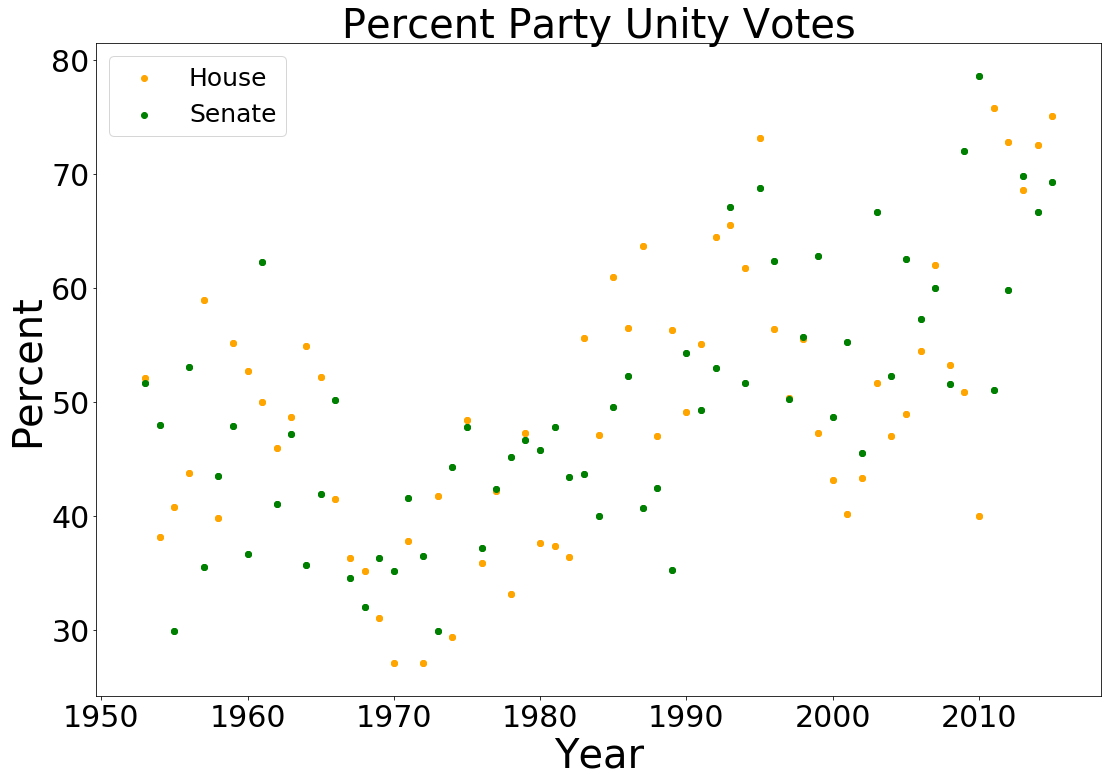

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stat

'''Reading the data. These include the percentage of roll-call votes in which a majority of voting Dems opposed
a majority of voting Republicans'''
party_vote_unity_df = pd.read_csv('data/party_vote_unity.csv', index_col=0)
house_party_vote_unity = party_vote_unity_df.loc[party_vote_unity_df['Chamber'] == 'House']
senate_party_vote_unity = party_vote_unity_df.loc[party_vote_unity_df['Chamber'] == 'Senate']


'''Setting up the plot'''
fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()
label_count = 0
for year in party_vote_unity_df.index.values: 
    if (label_count == 0):
        ax.scatter(year, house_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='orange', label='House')
        ax.scatter(year, senate_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='green', label='Senate')
        label_count = 1
    else:    
        ax.scatter(year, house_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='orange')
        ax.scatter(year, senate_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='green')

ax.set_title('Percent Party Unity Votes', fontsize=40)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
ax.legend(fontsize=25)
ax.tick_params(labelsize=30)
plt.savefig('images/party_unity')
plt.show()

It's obvious that the past 5 or so years have seen an unprecedented level of party voting unity in Congress. But will this trend continue? The mid-90s (right around the [Gingrich revolution](https://en.wikipedia.org/wiki/Republican_Revolution)) also saw a peak level of party unity votes, but evidently things calmed down a few years afterwards. To make a prediction, we need the help of our dear friend linear regression. 

First, let's make some *predictor lines* (AKA best-fit lines). The hypothesis we'll test for is that future data will fall close to these lines. 

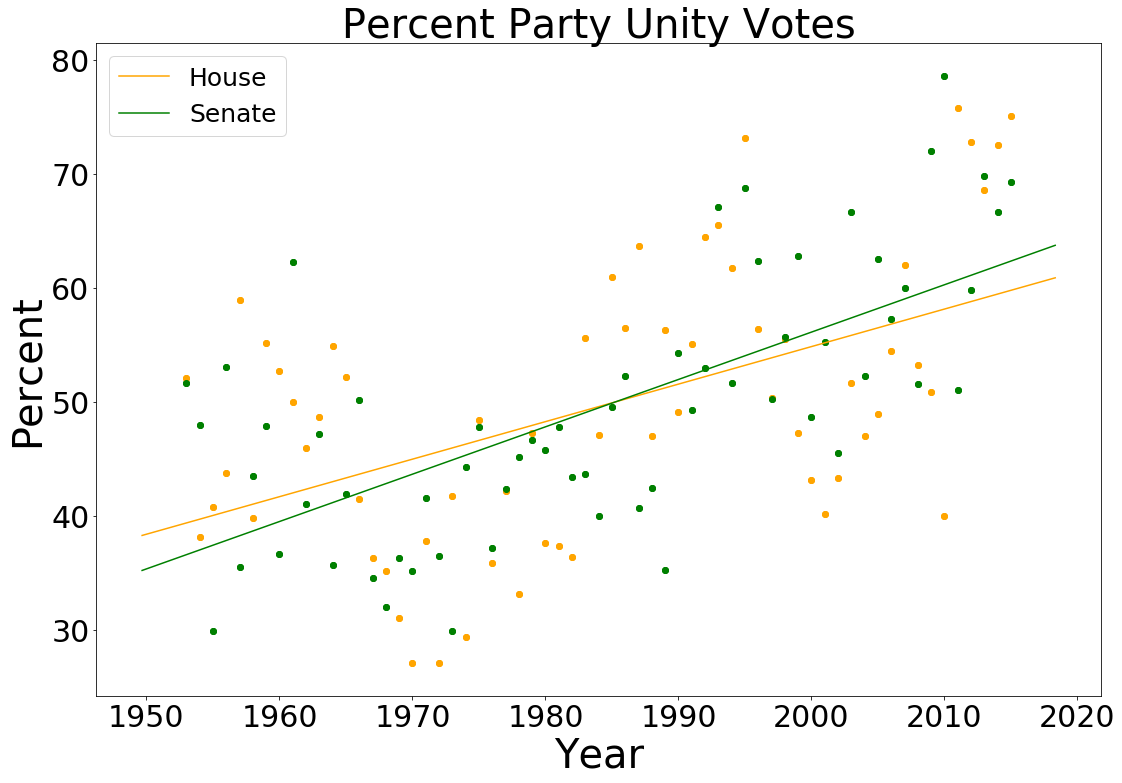

In [3]:
fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()

#https://www.brookings.edu/wp-content/uploads/2017/01/vitalstats_ch8_tbl3.pdf
#house_party_vote_unity.loc[1953]['PctPartyUnityVotes']

'''Data include the percentage of roll-call votes in which a percentage of voting Dems opposed
a majority of voting Republicans'''
for year in party_vote_unity_df.index.values: 
    ax.scatter(year, house_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='orange')
    ax.scatter(year, senate_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='green')
ax.set_title('Percent Party Unity Votes', fontsize=40)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('Percent', fontsize=40)
ax.tick_params(labelsize=30)

'''Calculating best-fit lines for the plots.'''    
house_best_fit_coeffs = np.polyfit(list(set(house_party_vote_unity.index.values)), 
                                   list(house_party_vote_unity['PctPartyUnityVotes']), deg=1)
house_func = np.poly1d(house_best_fit_coeffs)
x_0, x_1 = ax.get_xlim()
ax.plot([x_0, x_1], [house_func(x_0), house_func(x_1)], color='orange', label='House')

senate_best_fit_coeffs = np.polyfit(list(set(senate_party_vote_unity.index.values)), 
                                   list(senate_party_vote_unity['PctPartyUnityVotes']), deg=1)
senate_func = np.poly1d(senate_best_fit_coeffs)
ax.plot([x_0, x_1], [senate_func(x_0), senate_func(x_1)], color='green', label='Senate')

'''Displaying the plot and saving the image.'''
ax.legend(fontsize=25)
plt.savefig('images/party_unity_best_fit.png')
plt.show()

Before even doing a test, it's pretty clear to see that the past data don't fit these lines very well. Unsurprisingly, a two-sided t-test reveals that with incredibly high confidence ($p = 0.9999$ for the House, and $p=1$ for the Senate), we have to reject the prediction that future Congresses will continue to see higher party vote unity levels. 

In [4]:
t_test_house = stat.ttest_1samp(house_party_vote_unity['PctPartyUnityVotes'], house_party_vote_unity['PctPartyUnityVotes'].mean())
t_test_senate = stat.ttest_1samp(senate_party_vote_unity['PctPartyUnityVotes'], senate_party_vote_unity['PctPartyUnityVotes'].mean())

In [5]:
print(t_test_house)
print(stat.spearmanr(house_party_vote_unity['PctPartyUnityVotes'], house_party_vote_unity.index.values))

Ttest_1sampResult(statistic=4.7022880821694271e-15, pvalue=0.99999999999999623)
SpearmanrResult(correlation=0.46108610890970464, pvalue=0.00014289839792008851)


In [6]:
print(t_test_senate)
print(stat.spearmanr(senate_party_vote_unity['PctPartyUnityVotes'], senate_party_vote_unity.index.values))

Ttest_1sampResult(statistic=0.0, pvalue=1.0)
SpearmanrResult(correlation=0.66387432161100179, pvalue=3.0166747334898004e-09)


It's important to note that this test is quite narrow. It doesn't say that party vote unity will decline - it might stay at this historical peak. It also isn't a great measure: the dataset I used counted a 'party unity vote' as one in which a majority of Dems voted against a majority of Republicans - but it ignores routine votes like low-level confirmations, meaningless bills to [rename things](https://www.govtrack.us/congress/bills/115/hr2154), and doesn't track bills that never made it to the floor. 

## Congressional Ideology Scores

A different argument for increased partisanship might point to the widening ideological gulf between the two parties. It's difficult to quantify the extent to which an official is 'liberal' or 'conversative', but one such widely-used measure is the [Poole-Rosenthal DW-NOMINATE](https://voteview.com) scores. Under their liberal-conservative axis, a high negative score indicates a highly liberal Congress member, high positive indicates conservative, and close to $0$ indicates moderate.

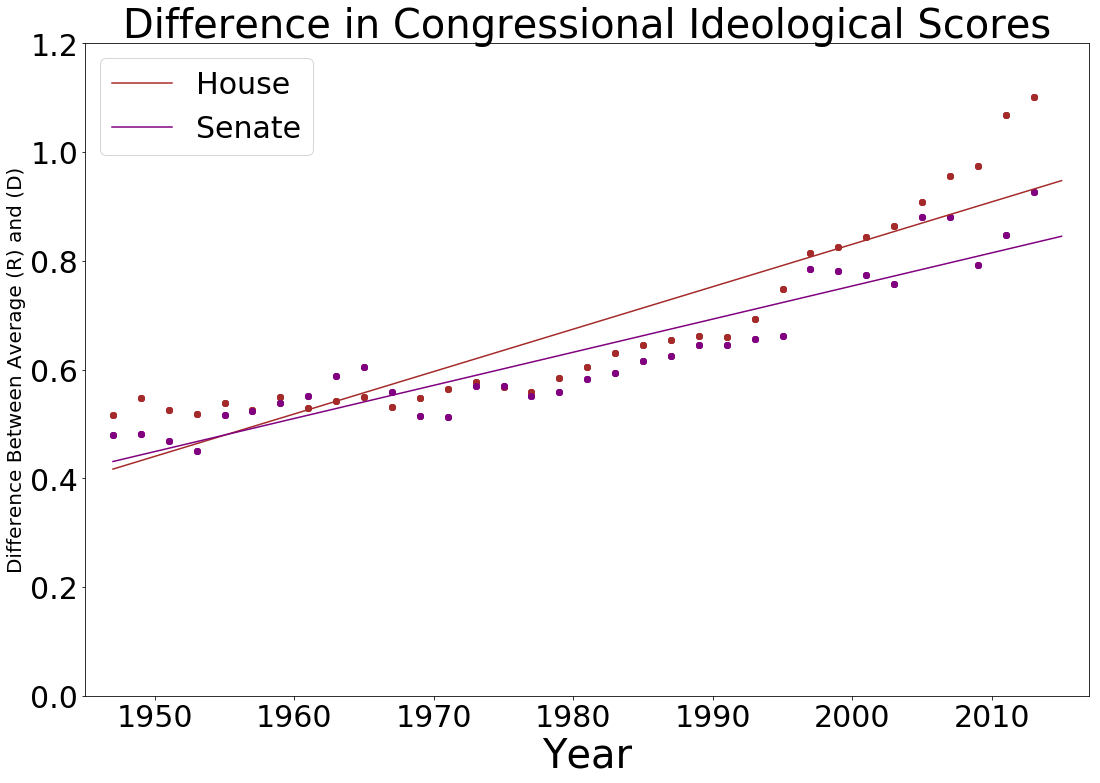

In [10]:
'''Ingesting data. We'll look at the chamber averages for Republicans and Democrats.'''
senate_ideology_df = pd.read_csv('data/ideological_positions_senate_committees.csv', index_col=1)
house_ideology_df = pd.read_csv('data/ideological_positions_house_committees.csv', index_col=1)

house_chamber_avg = house_ideology_df.loc[house_ideology_df['Committee'] == 'Chamber average']
house_dems_avg = house_chamber_avg.loc[house_chamber_avg['Party'] == 'Democrats']
house_repubs_avg = house_chamber_avg.loc[house_chamber_avg['Party'] == 'Republicans']

senate_chamber_avg = senate_ideology_df.loc[senate_ideology_df['Committee'] == 'Chamber average']
senate_dems_avg = senate_chamber_avg.loc[senate_chamber_avg['Party'] == 'Democrats']
senate_repubs_avg = senate_chamber_avg.loc[senate_chamber_avg['Party'] == 'Republicans']

house_avg_difference = pd.to_numeric(house_repubs_avg['Position']) - pd.to_numeric(house_dems_avg['Position'])
senate_avg_difference = pd.to_numeric(senate_repubs_avg['Position']) - pd.to_numeric(senate_dems_avg['Position'])

'''Initialize the plot'''
fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()

'''Create scatterplots of the difference between average Republican and Dem over the years'''
for year in house_chamber_avg.index.values: 
    ax.scatter(year, house_avg_difference[year], color='brown')
    ax.scatter(year, senate_avg_difference[year], color='purple')
#plt.plot(list(senate_chamber_avg.index.values), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

'''Plotting the best-fit lines'''
house_ideological_difference = pd.to_numeric(house_repubs_avg['Position']) - pd.to_numeric(house_dems_avg['Position'])
house_best_fit_coeffs = np.polyfit(list(set(house_chamber_avg.index.values)), list(house_ideological_difference), deg=1)
house_func = np.poly1d(house_best_fit_coeffs)
senate_ideological_difference = pd.to_numeric(senate_repubs_avg['Position']) - pd.to_numeric(senate_dems_avg['Position'])
senate_best_fit_coeffs = np.polyfit(list(set(senate_chamber_avg.index.values)), list(senate_ideological_difference), deg=1)
senate_func = np.poly1d(senate_best_fit_coeffs)
x_0, x_1 = 1947, 2015
ax.plot([x_0, x_1], [house_func(x_0), house_func(x_1)], color='brown', label='House')
ax.plot([x_0, x_1], [senate_func(x_0), senate_func(x_1)], color='purple', label='Senate')

ax.set_title('Difference in Congressional Ideological Scores', fontsize=40)
ax.set_xlim(1945, 2017)
ax.set_ylim(0, 1.2)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('Difference Between Average (R) and (D)', fontsize=20)
ax.tick_params(labelsize=30)
ax.legend(fontsize=30)
plt.savefig('images/ideological_differences.png')
plt.show()

Here, the data tell a much cleaner story. Unlike percentage of party unity votes, the data points stick very closely to their best-fit lines here. A statistical test of correlation (I used the non-parametric [Spearman's correlation coefficent](https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient)) gives a resounding 'yes.'

In [8]:
stat.spearmanr(house_avg_difference, house_avg_difference.index.values)

SpearmanrResult(correlation=0.97685079359123805, pvalue=5.2929022446650901e-23)

In [9]:
stat.spearmanr(senate_avg_difference, senate_avg_difference.index.values)

SpearmanrResult(correlation=0.94337895043809739, pvalue=6.8278968731226292e-17)

The House and the Senate both show high very strong correlations of $r \approx 0.98$ ($p$-value of $5 * 10^{-23}$) and and $r \approx 0.94$ ($p$-value of $7 * 10^{-17}$) , with $r = 1$ being a perfect correlation. By contrast, percent of party unity votes had $r \approx 0.46$ for the House and $r \approx 0.66$ for the Senate - still a positive relationship, but much weaker.

Like percentage of party unity votes, these data have limitations. I only used 1 dimension of Poole and Roosenthal's ideological scores (the 'liberal-conservative' axis), but their system uses over [10 dimensions and concludes that a 2-dimensional model is the best fit](https://voteviewblog.com/2017/01/12/the-collapse-of-the-voting-structure-possible-big-trouble-ahead/). I suspect a more detailed look at the data would reveal the the story is more complicated. Moreover, I only examine data after WW2, when the distance between the parties was at a [historical low](https://voteviewblog.com/2016/10/20/house-and-senate-means-1879-2016-as-of-october-2016/). It's quite plausible that this unity was a historical anomaly that ended once there was no war to unite the country any more. 

## Conclusion

With respect to these data, it's clear that partisanship levels are at a historical peak. Whether this trend will continue is debatable in the case of party unity votes, but the ideological gap will almost certainly continue to widen. This trend towards separation will probably increase Congressional gridlock and distrust of the other side, a critical weakness in a system designed to operate on consensus. 

Of course, whether partisanship is increasing is the easy question. The much more important question is what to do about it - one which I'm not sure we have the data to answer.